In [53]:
import matplotlib.pyplot as plt
import numpy
import os
import pandas

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
wavelengths = pandas.read_csv('wavelengths.csv')

In [3]:
wavelengths.head()

,band_no,wavelength
0,1,462.08
1,2,465.27
2,3,468.47
3,4,471.67
4,5,474.86


In [4]:
gt = pandas.read_csv('train_gt.csv', converters={'sample_index': str})
len(wavelengths)

150

Pearson correlation.

In [5]:
gt.corr().style.background_gradient(cmap="Greys")

,P,K,Mg,pH
P,1.000000,0.413494,-0.103034,0.120067
K,0.413494,1.000000,0.234162,0.168793
Mg,-0.103034,0.234162,1.000000,0.010980
pH,0.120067,0.168793,0.010980,1.000000


In [29]:
std = numpy.empty(len(wavelengths))

columnnames = ['sample', 'size_x', 'size_y', 'p', 'k', 'mg', 'ph']
dtypes = {'sample': 'str', 'size_x': 'float', 'size_y':'float', 'p': 'float', 'k': 'float', 'mg': 'float', 'ph':'float'}
for i in range(len(wavelengths)):
    columnnames.append(f'std_{i}')
    columnnames.append(f'mean_{i}')
    dtypes[f'std_{i}'] = 'float'
    dtypes[f'mean_{i}'] = 'float'
data = pandas.DataFrame(columns=columnnames)

In [30]:
train_files = os.listdir('train_data')
for tf in [os.path.join('train_data', f) for f in train_files if f.endswith('npz')]:
    with numpy.load(tf) as npz:
        arr = numpy.ma.MaskedArray(**npz)
        sample_name = os.path.basename(tf).replace('.npz', '')
        gt_values = gt[gt['sample_index'] == sample_name]
        data_dict = {
            'sample': sample_name,
            'size_x': len(arr[0]),
            'size_y': len(arr[0][0]),
            'p': gt_values['P'].values[0],
            'k': gt_values['K'].values[0],
            'mg': gt_values['Mg'].values[0],
            'ph': gt_values['pH'].values[0]}
        for i in range(len(arr)):
            data_dict[f'std_{i}'] = arr[i].std()
            data_dict[f'mean_{i}'] = arr[i].mean()
        data = pandas.concat([data, pandas.DataFrame.from_dict([data_dict])], ignore_index=True)
data = data.astype(dtypes)

In [31]:
for lab in ['p','k', 'mg', 'ph']:
    print(data.corr().filter(like=lab).sort_values(lab))

                p        ph
mg      -0.103034  0.010980
mean_44 -0.064498  0.063450
mean_43 -0.064489  0.063578
mean_42 -0.064344  0.063927
mean_45 -0.064260  0.063458
...           ...       ...
std_1    0.065793 -0.083758
std_0    0.066053 -0.082920
ph       0.120067  1.000000
k        0.413494  0.168793
p        1.000000  0.120067

[306 rows x 2 columns]
               k
mean_0 -0.041827
mean_1 -0.041427
mean_2 -0.041068
mean_3 -0.040508
mean_4 -0.040047
...          ...
std_76  0.130756
ph      0.168793
mg      0.234162
p       0.413494
k       1.000000

[306 rows x 1 columns]
               mg
p       -0.103034
ph       0.010980
size_x   0.042427
size_y   0.042601
mean_68  0.095990
...           ...
std_141  0.185168
std_139  0.185194
std_138  0.185320
k        0.234162
mg       1.000000

[306 rows x 1 columns]
              ph
size_y -0.332312
size_x -0.324951
std_76 -0.170056
std_77 -0.169280
std_75 -0.167541
...          ...
mean_2  0.148556
mean_1  0.149775
mean_0  0.151284
k 

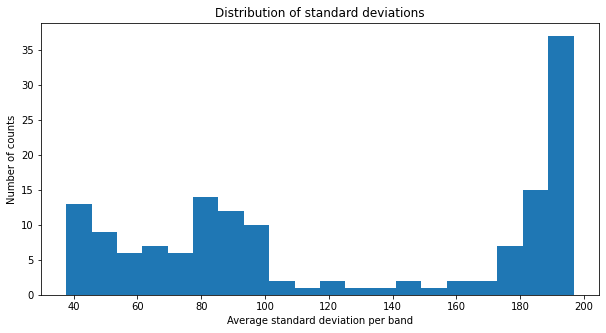

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(data.filter(like='std_').mean(), bins=20)
ax.set_xlabel('Average standard deviation per band')
ax.set_ylabel('Number of counts')
ax.set_title('Distribution of standard deviations')
plt.show()

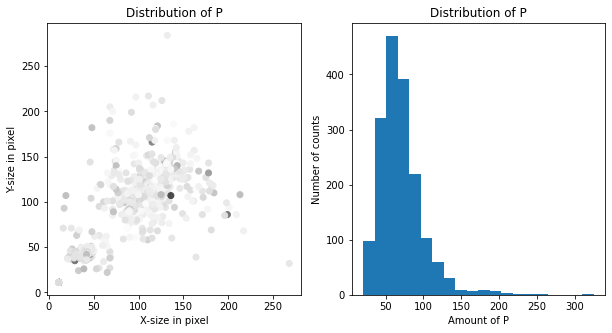

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data[['size_x']], data[['size_y']], c=data[['p']].values, cmap='Greys')
ax[0].set_xlabel('X-size in pixel')
ax[0].set_ylabel('Y-size in pixel')
ax[0].set_title('Distribution of P')
ax[1].hist(data[['p']], bins=20)
ax[1].set_xlabel('Amount of P')
ax[1].set_ylabel('Number of counts')
ax[1].set_title('Distribution of P')
plt.show()

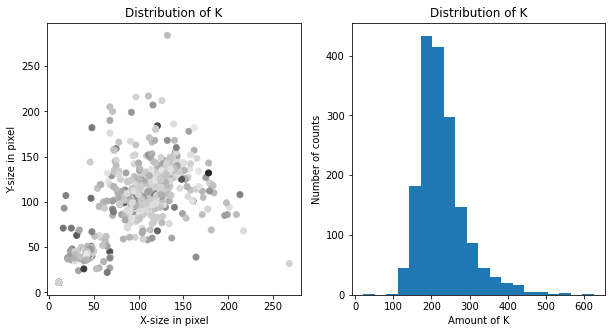

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data[['size_x']], data[['size_y']], c=data[['k']].values, cmap='Greys')
ax[0].set_xlabel('X-size in pixel')
ax[0].set_ylabel('Y-size in pixel')
ax[0].set_title('Distribution of K')
ax[1].hist(data[['k']], bins=20)
ax[1].set_xlabel('Amount of K')
ax[1].set_ylabel('Number of counts')
ax[1].set_title('Distribution of K')
plt.show()

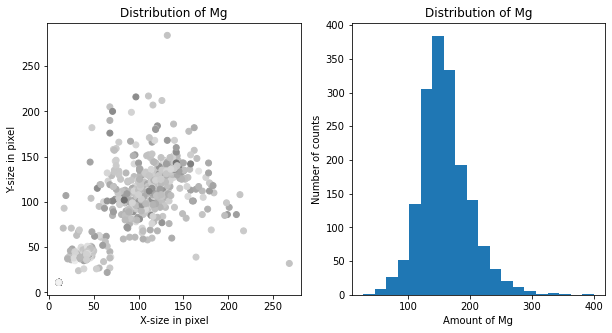

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data[['size_x']], data[['size_y']], c=data[['mg']].values, cmap='Greys')
ax[0].set_xlabel('X-size in pixel')
ax[0].set_ylabel('Y-size in pixel')
ax[0].set_title('Distribution of Mg')
ax[1].hist(data[['mg']], bins=20)
ax[1].set_xlabel('Amount of Mg')
ax[1].set_ylabel('Number of counts')
ax[1].set_title('Distribution of Mg')
plt.show()

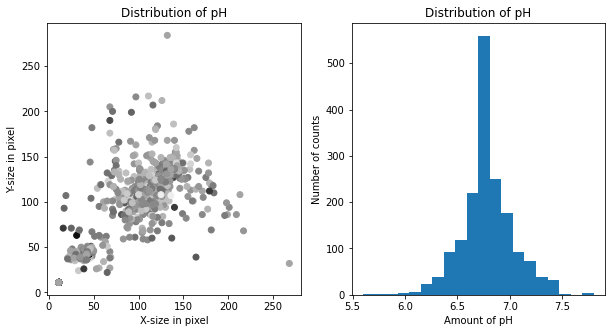

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(data[['size_x']], data[['size_y']], c=data[['ph']].values, cmap='Greys')
ax[0].set_xlabel('X-size in pixel')
ax[0].set_ylabel('Y-size in pixel')
ax[0].set_title('Distribution of pH')
ax[1].hist(data[['ph']], bins=20)
ax[1].set_xlabel('Amount of pH')
ax[1].set_ylabel('Number of counts')
ax[1].set_title('Distribution of pH')
plt.show()

In [98]:
train, test = train_test_split(data)
train_x = train.drop(labels=['p','k', 'mg','ph', 'sample'], axis=1)
train_y = train[['p','k', 'mg','ph']]
test_x = test.drop(labels=['p','k', 'mg','ph', 'sample'], axis=1)
test_y = test[['p','k', 'mg','ph']]

In [100]:
forest = RandomForestRegressor()
forest.fit(train_x, train_y)

RandomForestRegressor()

In [116]:
prediction = pandas.DataFrame(forest.predict(test_x), columns=['p','k', 'mg','ph'])

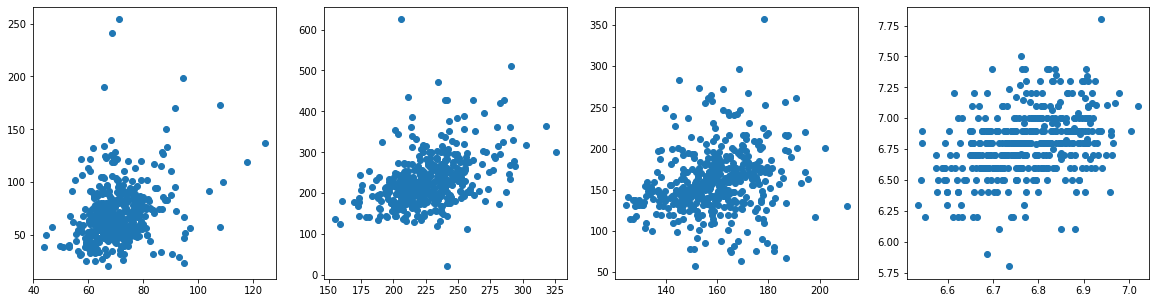

In [117]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].scatter(prediction[['p']], test_y[['p']])
ax[1].scatter(prediction[['k']], test_y[['k']])
ax[2].scatter(prediction[['mg']], test_y[['mg']])
ax[3].scatter(prediction[['ph']], test_y[['ph']])
plt.show()

In [118]:
def mse_base(ser):
    return numpy.mean((ser - ser.mean())**2, axis=0)

def mse_ref(dat, ref):
    return numpy.mean((dat - ref.mean())**2, axis=0)

In [123]:
bmse = mse_base(test_y)

In [124]:
rmse = mse_ref(prediction, test_y)

In [125]:
(rmse/bmse)

p     0.120395
k     0.167610
mg    0.142455
ph    0.146997
dtype: float64